In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Load the df
df = pd.read_csv("data.csv")
print(df.head())

month_labels = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]




       tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150


In [4]:

# creating a inforgraphic, define grid
fig = plt.figure(figsize=(20, 16), facecolor="#f4f4f4")
fig.suptitle(
    "An Analytical Study of Rain and Temperature Weather in Bangladesh\n",
    fontweight="bold",
    fontsize=35,
    color="#0066cc",
)
fig.subplots_adjust(
    left=0.05,  # Padding from the left edge of the figure
    right=0.90,  # Padding from the right edge of the figure
    top=0.85,  # Padding from the top edge of the figure (adjusted to leave space for the title)
    bottom=0.05,  # Padding from the bottom edge of the figure
    wspace=0.1,  # Width padding between subplots
    hspace=0.3,  # Height padding between subplots
)
grid_spec = fig.add_gridspec(nrows=4, ncols=2)



<Figure size 2000x1600 with 0 Axes>

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

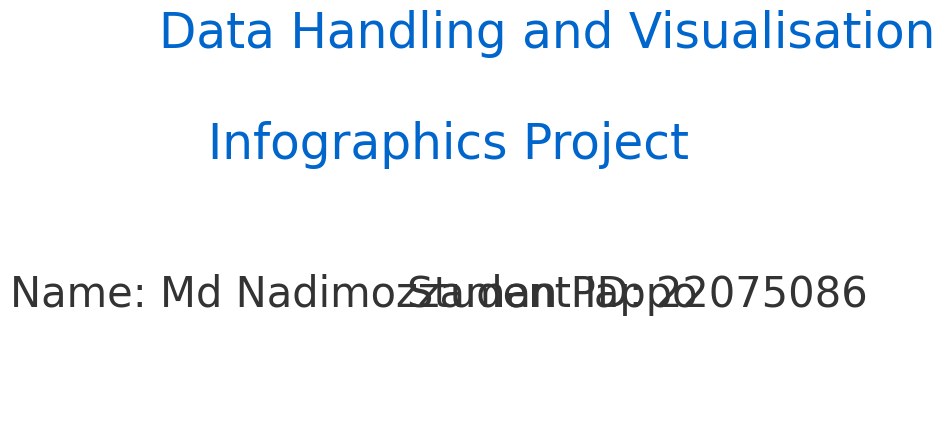

In [5]:
# Title
ax = fig.add_subplot(grid_spec[0, 0:2])
plt.text(
    0.3,
    1,
    "Data Handling and Visualisation",
    fontsize=35,
    color="#0066cc",
)
plt.text(0.4, 0.7, "Infographics Project", fontsize=35, color="#0066cc")
plt.text(0.001, 0.3, "Name: Md Nadimozzaman Pappo", fontsize=30, color="#333333")
plt.text(0.8, 0.3, "Student ID: 22075086", fontsize=30, color="#333333")
plt.axis("off")




In [6]:
# Plot 1: Boxplot of Rainfall by Month
ax1 = fig.add_subplot(grid_spec[1, 0])
sns.boxplot(x="Month", y="rain", data=df, ax=ax1)
ax1.set_title("Monthly Rainfall Distribution")
ax1.set_xlabel("Month")
ax1.set_ylabel("Rainfall (mm)")
ax1.set_xticks(range(12))
ax1.set_xticklabels(month_labels)



[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

In [7]:
# 2. plot temperature by month
ax2 = fig.add_subplot(grid_spec[1, 1])
sns.boxplot(x="Month", y="tem", data=df, ax=ax2)
ax2.set_title("Monthly Temperature Distribution")
ax2.set_xlabel("Month")
ax2.set_ylabel("Temperature (°C)")
ax2.set_xticks(range(12))
ax2.set_xticklabels(month_labels)



[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

In [8]:
# Plot 3: Rain vs Temp Scatter Plot
ax3 = fig.add_subplot(grid_spec[2, 0])
# Normalize the data for better color scaling
df["temp_norm"] = (df["tem"] - df["tem"].min()) / (df["tem"].max() - df["tem"].min())
df["rain_norm"] = (df["rain"] - df["rain"].min()) / (
    df["rain"].max() - df["rain"].min()
)


In [9]:

# Calculate a combined color intensity based on both normalized temperature and rain
df["color_intensity"] = df["temp_norm"] + df["rain_norm"]

scatter = ax3.scatter(
    x=df["tem"], y=df["rain"], c=df["color_intensity"], cmap="coolwarm", alpha=0.7
)
fig.colorbar(scatter, ax=ax3, label="Color Intensity (Temp + Rain)")

ax3.set_title("Scatter Plot of Rain vs Temperature with Color Intensity")
ax3.set_xlabel("Temperature (°C)")
ax3.set_ylabel("Rainfall (mm)")



Text(0, 0.5, 'Rainfall (mm)')

Text(0, 0.5, 'Average Value')

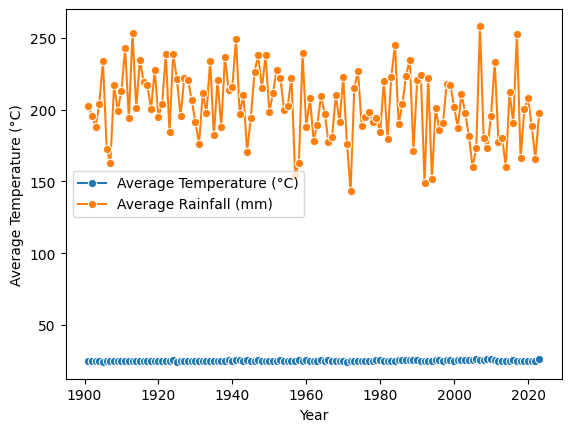

In [10]:
# 4. plot yearly trend of temperature and rainfall
ax4 = fig.add_subplot(grid_spec[2, 1])
# Calculate the yearly average for temperature and rainfall
yearly_summary = df.groupby("Year").agg({"tem": "mean", "rain": "mean"}).reset_index()

# Rename columns for clarity
yearly_summary = yearly_summary.rename(
    columns={"tem": "Average Temperature (°C)", "rain": "Average Rainfall (mm)"}
)

sns.lineplot(
    x="Year",
    y="Average Temperature (°C)",
    data=yearly_summary,
    label="Average Temperature (°C)",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="Average Rainfall (mm)",
    data=yearly_summary,
    label="Average Rainfall (mm)",
    marker="o",
)

ax4.set_title("Yearly Trend of Average Temperature and Rainfall")
ax4.set_xlabel("Year")
ax4.set_ylabel("Average Value")




In [11]:
# Textblock for the summary
ax5 = fig.add_subplot(grid_spec[3, 0:2])
summary_text = "The inforphic provides an analytical study of rainfall and temperature in Bangladesh.\nBangladesh has a tropical monsoon climate, characterized by heavy seasonal rainfall, high temperatures,\nand high humidity. The data used in this study includes monthly rainfall and temperature values from \n1901 to 2023. The boxplots show the distribution of rainfall and temperature by month. \nThe scatter plot shows the relationship between temperature and rainfall. \nThe color intensity is based on the normalized temperature and rainfall values. \nThe line plot shows the yearly trend of average temperature and rainfall."
ax5.text(0, 0.8, summary_text, fontsize=25, color="#333333", va="top")
ax5.axis("off")  # Hide axes for the summary section


# plt.savefig("22075086.png", dpi=300, bbox_inches="tight", facecolor="#f4f4f4")
plt.show()